# Hochschule Bonn-Rhein-Sieg

# Learning and Adaptivity - Assignment 8

## Team Members: 

### Erick Kramer

### Mihir Patil

### Sushma Devaramani

In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import time

import seaborn as sns; sns.set()


### 1. Get the MNIST dataset, select one kind of model and train multiple instances of the same model in this dataset (say, from 1 to 100).

* The MNIST dataset is selected and trained using the Random Forest algorithm.
* Initially, the MNIST dataset is fetched using 'fetch_mldata' function from sklearn package.
* The number of training data is taken as 60000 and testing data is 10000

In [79]:
mnist = fetch_mldata('MNIST original')

#Extract training and testing data
ntrain = 60000
ntest = 10000

#Training and testing sets
indices = np.arange(len(mnist.data))
random.seed(0)

train_idx = random.sample(list(indices),ntrain)
test_idx = random.sample(list(indices),ntest)

X_train, y_train = mnist.data[train_idx], mnist.target[train_idx]
X_test, y_test = mnist.data[test_idx], mnist.target[test_idx]

* The selected ensemble method is Random Forest and the selected model is Decision tree.
* The number of estimators is selected in the range (2, 100) in jumps of 5.
* Then we have trained the ensemble for different number of estimators using 'RandomForestClassifier' method of sklearn package.


In [4]:
# Training random forest
start_time = time.time()
n_Estimators = np.hstack((np.arange(2,100,5),100))

# Creating list of random forest with the different number of estimators
list_clf = list()
list_predictions = list()
list_accuracies = list()
list_probabilities = list()
for i,estimators in enumerate(n_Estimators):
    
    #Create the random forest
    list_clf.append(RandomForestClassifier(n_estimators=estimators, random_state=0))
    
    #Train the random forest
    list_clf[i].fit(X_train,y_train)
    
    #Make a prediction of the labels
    list_predictions.append(list_clf[i].predict(X_test))
    
    list_accuracies.append(list_clf[i].score(X_test,y_test))
    
    list_probabilities.append(list_clf[i].predict_proba(X_test))
    
print(len(list_clf))
print("My computer took: ", time.time() - start_time)

21
('My computer took: ', 510.15578293800354)


In [5]:
#Back up of lists
list_clf_bk = list_clf
list_predictions_bk = list_predictions
list_accuracies_bk = list_accuracies
list_probabilities_bk = list_probabilities

### Estimation of accuray and uncertainty of test image

Considering one of the test image, we have calculated the accuracy and uncertainty for different number of estimators.

In [92]:
# Printing results
# For the first test image
for i in range(len(list_clf)):
    print("Number of trees: ", n_Estimators[i])
    print("Accuracy: ", list_accuracies[i])
    print("Uncertainty for first test image: ",list_probabilities[i][0])
    print("___________________________________________________________________________")

('Number of trees: ', 2)
('Accuracy: ', 0.9183)
('Uncertainty for first test image: ', array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5]))
___________________________________________________________________________
('Number of trees: ', 7)
('Accuracy: ', 0.9869)
('Uncertainty for first test image: ', array([0.14285714, 0.        , 0.        , 0.        , 0.14285714,
       0.        , 0.        , 0.14285714, 0.        , 0.57142857]))
___________________________________________________________________________
('Number of trees: ', 12)
('Accuracy: ', 0.9917)
('Uncertainty for first test image: ', array([0.08333333, 0.        , 0.        , 0.        , 0.08333333,
       0.        , 0.        , 0.08333333, 0.        , 0.75      ]))
___________________________________________________________________________
('Number of trees: ', 17)
('Accuracy: ', 0.9925)
('Uncertainty for first test image: ', array([0.05882353, 0.        , 0.        , 0.        , 0.05882353,
       0.05882353, 0.   

### 2.- With the trained models, make ensembles of [2, 3, ..., 100] members, evaluate the testing accuracy of each ensemble, and estimate the uncertainty of their outputs using a histogram or average of softmax outputs (depending on the model).

* For the trained models, We have obtained the probability values for different number of trees. 
* The prediction probabilities for varying number of trees helps us determine how the uncertainty varies as the number of trees are increased.
* The histograms of probabilty values are plotted for different number of trees. 

### Testing Image

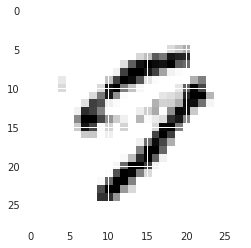

In [105]:
image = X_test[0]
plt.imshow(image.reshape(28,28), cmap='binary')

### Plotting the probabilities

Text(0.5,1,u'Number of trees: 100')

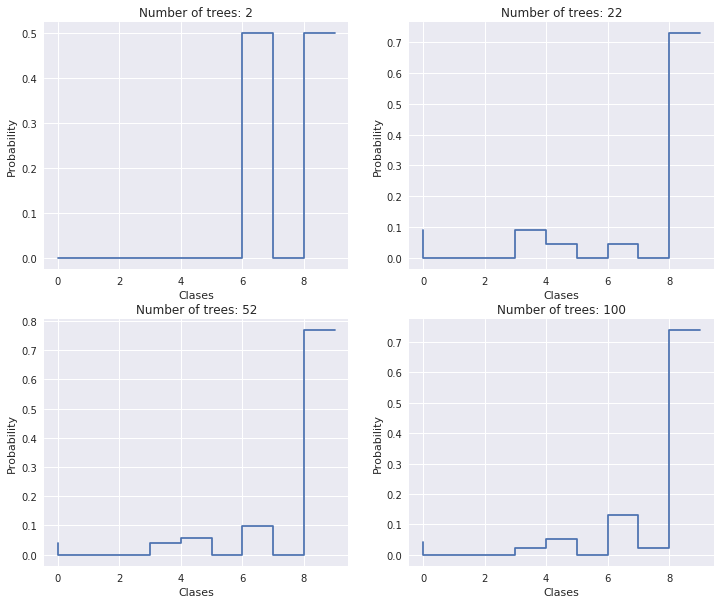

In [106]:
# Histogram part for a sample of ensembles for the first test image
image = X_test[0]
x_axis = np.arange(0,10)
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.step(x_axis, list_probabilities[0][0])
plt.xlabel('Clases')
plt.ylabel('Probability')
plt.title('Number of trees: 2')

plt.subplot(2,2,2)
plt.step(x_axis, list_probabilities[4][0])
plt.xlabel('Clases')
plt.ylabel('Probability')
plt.title('Number of trees: 22')

plt.subplot(2,2,3)
plt.step(x_axis, list_probabilities[10][0])
plt.xlabel('Clases')
plt.ylabel('Probability')
plt.title('Number of trees: 52')

plt.subplot(2,2,4)
plt.step(x_axis, list_probabilities[-1][0])
plt.xlabel('Clases')
plt.ylabel('Probability')
plt.title('Number of trees: 100')

#### Comments: 
* There are varying probabilities for different number of trees.
* For two trees, the probabilities are equally distributed among two class (6 and 8).
* As the number of trees are increased, the probabilities are gradually concentrating to the correct class.

### 3. Does the accuracy and uncertainty improve by having more members in each ensemble?

* Yes, the accuraccy increases as the number of members in each ensemble increases. While the uncertainity decreases with increase in the number of members of each ensemble.


* The rationale of Ensembles is that complex models have high variance and averaging many of them contributes to reducing it. In principle a complex model is able to perfectly learn the true function, but this is also its drawback. In practice it adapts to much to the subset of the data that is seeing, thus several complex model that are trained with different subset of the data display high variability in the resulting model. This type of problem can be addressed by averaging many complex models as Rnadom Forest does: it builds a large ensemble of trees and then averages their prediction to obtain a final model.


* Hence we can conclude that by each tree perfectly learns only one feature in the input data, thus by having more trees in the forest we ensure that more features are learnt and by averaging the variance for each such tree we basically reduce the amount of uncertainity in the predicted value for the test image as we now have more number of learnt features.  

Citation: https://www.add-for.com/2016/03/22/ensemble-methods-random-forests/


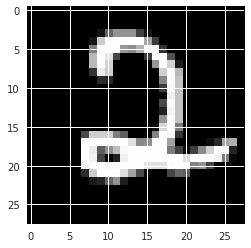

Class prediction probabilities in the first ensemble with only two trees [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Accuracy for the first ensemble 0.9183
Class prediction probabilities in the first ensemble with 100 trees [0.01 0.   0.98 0.   0.   0.01 0.   0.   0.   0.  ]
Accuracy for the first ensemble 0.995


NameError: name 'pred_single_img' is not defined

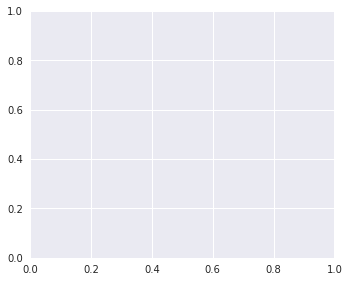

In [93]:
plt.imshow(X_test[1].reshape(28,28), cmap = 'gist_gray')
plt.show()
print '================================================================================================================='
print "Class prediction probabilities in the first ensemble with only two trees",list_probabilities[0][1]
print "Accuracy for the first ensemble",list_accuracies[0]
print '================================================================================================================='
print "Class prediction probabilities in the first ensemble with 100 trees",list_probabilities[20][1]
print "Accuracy for the first ensemble",list_accuracies[20]
                                            
fig = plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.step(x_axis, pred_single_img[0])
plt.subplot(2,2,2)
plt.step(x_axis, pred_single_img20[0])

4- Using a single ensemble of your choosing, find the misclassified examples in the test set and analyze the uncertainity of those examples. Can the uncertainty explain why those examples are misclassified?. 

In [9]:
forest_52 = list_clf[10]
predictions_52 = list_predictions[10]
proba_52 = list_probabilities[10]

misclassified_idx = []
for i in range(len(y_test)):
    if predictions_52[i] != y_test[i]:
        misclassified_idx.append(i)
        
print(len(misclassified_idx))

51


In [10]:
print("Predicted class: ", predictions_52[674])
print("True class: ", y_test[674])
a = sorted(proba_52[674], reverse=True)
print(a[0:2])

('Predicted class: ', 7.0)
('True class: ', 7.0)
[1.0, 0.0]


('Predicted class: ', 8.0)
('True class: ', 0.0)
('Predicted class: ', 8.0)
('True class: ', 8.0)


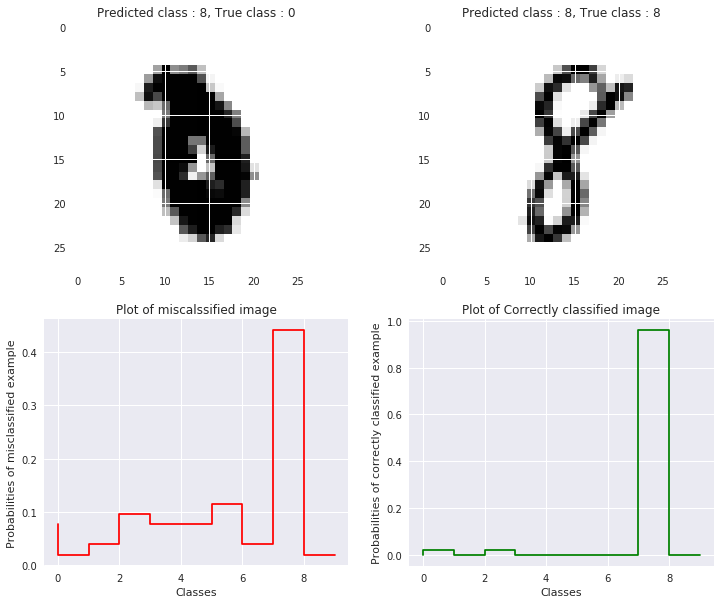

In [108]:
print("Predicted class: ", predictions_52[240])
print("True class: ", y_test[240])
plt.figure(figsize=(12,10))
bins = np.arange(0,10)
plt.subplot(2,2,3)
plt.step(bins, proba_52[240], color='r')
plt.xlabel('Classes')
plt.ylabel('Probabilities of misclassified example')
plt.title('Plot of miscalssified image') 

plt.subplot(2,2,4)
plt.step(bins, proba_52[260], color='g')
plt.xlabel('Classes')
plt.ylabel('Probabilities of correctly classified example')
plt.title('Plot of Correctly classified image') 

print("Predicted class: ", predictions_52[260])
print("True class: ", y_test[260])

plt.subplot(2,2,1)
plt.title('Predicted class : 8, True class : 0')
plt.imshow(X_test[240].reshape(28,28), cmap='binary' )
plt.subplot(2,2,2)
plt.title('Predicted class : 8, True class : 8')
plt.imshow(X_test[260].reshape(28,28), cmap='binary' )
plt.show()

In [16]:
def plot_hist(ensemble,image):
    predicted_classes = []
    for i,estimator in enumerate(ensemble.estimators_):
        predicted_classes.append(estimator.predict_proba(np.reshape(image,(1,-1)))[0])
    return predicted_classes

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])]


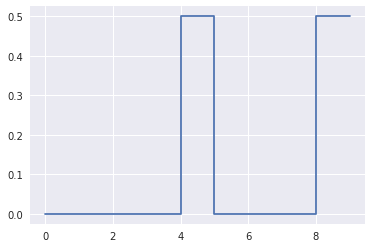

In [17]:
# #Prediction of a single tree in the forest for that particular image
# Ensemble of 2 trees
predicted_classes = plot_hist(list_clf[0], X_test[0])
predicted_classes[1] = np.array([0,0,0,0,0,1,0,0,0,0])
print(predicted_classes)
plt.step(np.arange(0,10),np.mean(predicted_classes,0))
# # Ensemble of 22
# ensemble = list_clf[4]
# # Ensemble of 52
# ensemble = list_clf[10]
# #Ensemble of 100 trees
# ensemble = list_clf[-1]]

# list_clf[20].estimators_[0].predict_proba(np.reshape(X_test[0],(1,-1)))[0]

In [61]:
x_train = np.linspace(-4,4, 20)
noise = np.random.normal(0,3**2,20)
y_train = x_train**3 + noise
x_train = x_train.reshape((-1,1))
crf = RandomForestRegressor(n_estimators=10, random_state=0)
crf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [73]:
extra_values = np.hstack(((np.arange(-6,-4)), np.arange(5,7)))
# print(extra_values)
# extra_predictions = crf.predict(extra_values.reshape(-1,1))

estimated_y = []
for i in range(len(crf.estimators_)):
    estimated_y.append(crf.estimators_[i].predict(extra_values.reshape(-1,1)))
    
    
estimated_y = np.array(estimated_y)

y_predict = np.vstack((extra_predictions[0:2][np.newaxis].T,x_train**3,extra_predictions[2:3][np.newaxis].T))
t = np.mean(y_predict, axis =1)
print estimated_y
variance = np.var(estimated_y)
print variance
var = []
for i in range(len(estimated_y)):
    var.append(np.var(estimated_y[i]))
mean_val = np.mean(estimated_y, axis=1)
# var1 = np.var(estimated_y[0])
# var2 = np.var(estimated_y[1])
# var3 = np.var(estimated_y[2])
#mean_val

[[-60.44391403 -60.44391403  42.33038453  42.33038453]
 [-60.44391403 -60.44391403  55.71022495  55.71022495]
 [-56.45099799 -56.45099799  55.71022495  55.71022495]
 [-56.45099799 -56.45099799  21.32276736  21.32276736]
 [-60.44391403 -60.44391403  55.71022495  55.71022495]
 [-60.44391403 -60.44391403  55.71022495  55.71022495]
 [ -3.45709055  -3.45709055  42.33038453  42.33038453]
 [-60.44391403 -60.44391403  42.33038453  42.33038453]
 [-60.44391403 -60.44391403  55.71022495  55.71022495]
 [-60.44391403 -60.44391403  43.91849897  43.91849897]]
2750.0503430022477


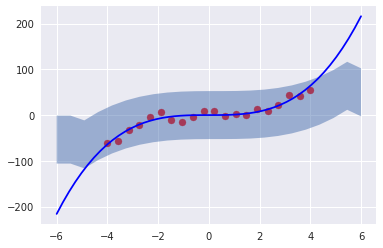

In [78]:
#Ground truth
x_true = np.linspace(-6,6)
y_true = x_true**3

plt.scatter(x_train,y_train, color='r')
plt.plot(x_true,y_true,'b')

plt.fill_between(np.linspace(-6,6,23), t.reshape(-1)+np.sqrt(variance), t.reshape(-1)-np.sqrt(variance), alpha=0.5 )

In [19]:
extra_values = np.hstack(((np.arange(-6,-4)), np.arange(5,7)))
print(extra_values)
extra_predictions = crf.predict(extra_values.reshape(-1,1))

y_predict = np.vstack((extra_predictions[0:2][np.newaxis].T,x_train**3,extra_predictions[2:3][np.newaxis].T))


[-6 -5  5  6]


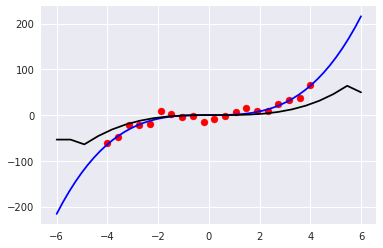

In [24]:
#Ground truth
x_true = np.linspace(-6,6)
y_true = x_true**3
plt.scatter(x_train,y_train, color='r')
plt.plot(x_true,y_true,'b')
plt.plot(np.linspace(-6,6,23), y_predict,'k')

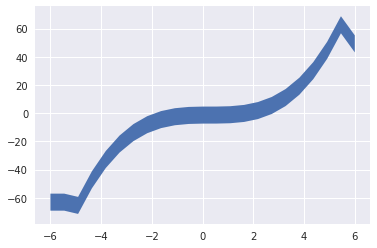

In [158]:
plt.fill_between(np.linspace(-6,6,23), y_predict.reshape(-1) + np.random.normal(0,3**2)+ 0.5, y_predict.reshape(-1) -np.random.normal(0,3**2)- 0.5)

In [ ]:
def train_data(num_estimators):
    crf = RandomForestRegressor(n_estimators=num_estimators, random_state=0)
    